# Importing the required data

- upload cleared .csv of energy per borough to 'data' in project
- upload shapefiles to 'data': .shp .cpg .dbf .prj .shx (from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)
- upload population (density) csv table into  from https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough

In [15]:
#setup data folder (it probably already exists)
!mkdir data

# Prepare for mapping
- download tools and libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
import matplotlib

%matplotlib inline

In [4]:
#setup environment
!pip install geopandas

     |████████████████████████████████| 921kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 5.8kB/s ta 0:00:01     |████▏                           | 1.3MB 2.0MB/s eta 0:00:05     |█████████████████▏              | 5.4MB 322kB/s eta 0:00:15
     |████████████████████████████████| 1.5MB 121kB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 7.4kB/s ta 0:00:01


In [5]:
import geopandas as gp

In [90]:
!pip install pysal==2.0.0

     |████████████████████████████████| 25.0MB 86kB/s  eta 0:00:01    |████████▏                       | 6.4MB 9.4MB/s eta 0:00:02     |█████████████▉                  | 10.7MB 2.5MB/s eta 0:00:06     |███████████████████▏            | 15.0MB 2.2MB/s eta 0:00:05     |███████████████████▊            | 15.4MB 2.2MB/s eta 0:00:05
  Using cached https://files.pythonhosted.org/packages/ca/46/5198aa24e61bb7eef28d06cb69e56bfa1942f4b6807d95a0b5ce361fe09b/palettable-3.3.0-py2.py3-none-any.whl
  Created wheel for pysal: filename=pysal-2.0.0-cp36-none-any.whl size=25233954 sha256=ac6d1f656e3c82728d68f44903310208eede2b1eb18bff675ffa717dee4ca1b8
  Stored in directory: /home/nbuser/.cache/pip/wheels/ca/b9/69/49a64348ddb1feaf76b426c81c1db7275cfabacd8bf4ccd778
Successfully built pysal


In [7]:
!pip install descartes

  Using cached https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-any.whl


In [8]:
import descartes

In [9]:
import pylab

pylab.rcParams['figure.figsize'] = (20., 16.)

# Look at data

In [17]:
#shapefiles
data_path = "~/library/data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


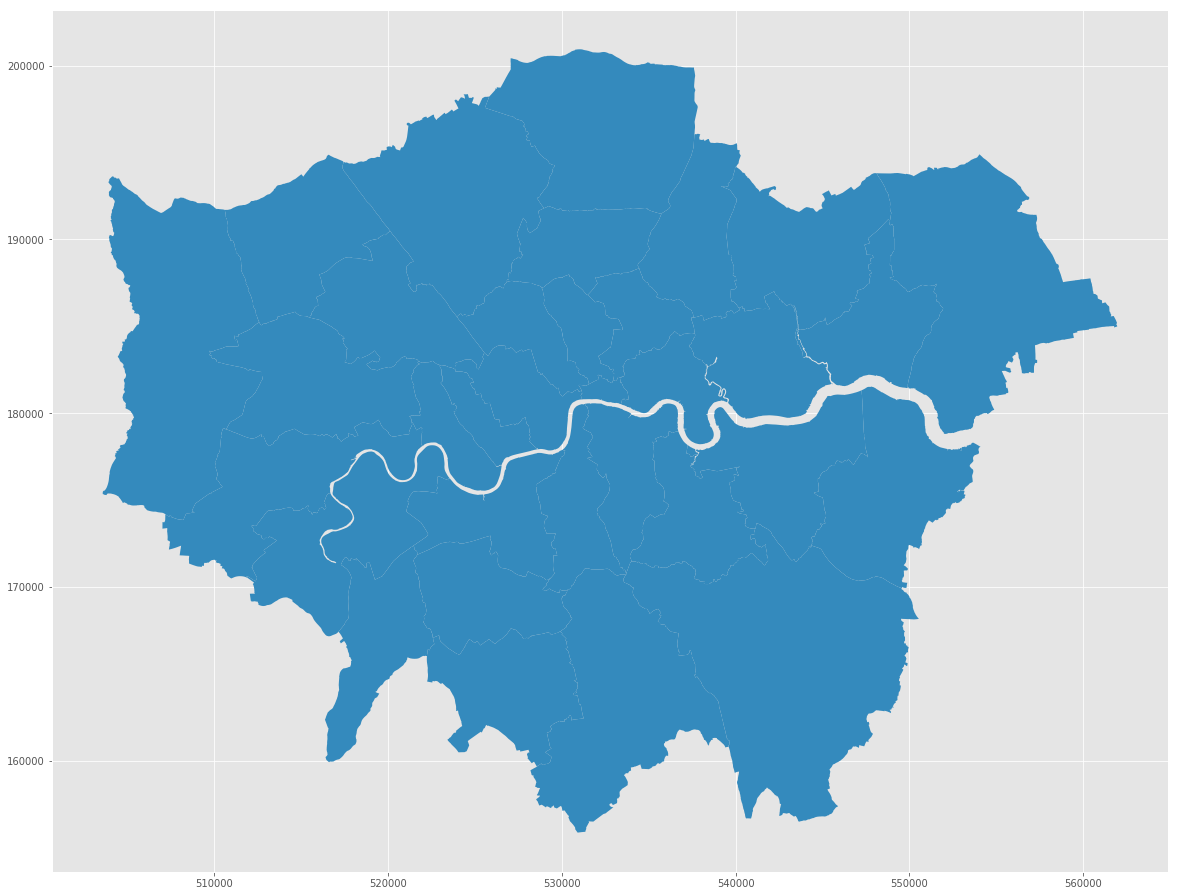

In [18]:
#checking how it looks
londonBoroughs.plot()

In [19]:
#energy
data_path = "~/library/data/cleared.csv" #use csv file
energy = pd.read_csv(data_path)

energy.head()

,Unnamed: 0,Code,Area,Year,Fuel,Sector,Measurement,Value
0,21714,E09000002,Barking and Dagenham,2005,All fuels,Total,GWh,2936.940241
1,21715,E09000003,Barnet,2005,All fuels,Total,GWh,6302.864473
2,21716,E09000004,Bexley,2005,All fuels,Total,GWh,4603.289488
3,21717,E09000005,Brent,2005,All fuels,Total,GWh,4886.587216
4,21718,E09000006,Bromley,2005,All fuels,Total,GWh,5608.616163


In [20]:
#population
data_path = "~/library/data/housing-density-borough.csv"
pop_density = pd.read_csv(data_path)

pop_density.head()

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1


# Creating new category: Energy/Resident

In [21]:
#simplifying population dataset
pop_density.drop('Inland_Area _Hectares', axis=1, inplace=True)
pop_density.drop('Total_Area_Hectares', axis=1, inplace=True) 
pop_density.drop('Population_per_square_kilometre', axis=1, inplace=True)
pop_density.drop('Square_Kilometres', axis=1, inplace=True)
pop_density.rename(columns={'Year':'Pop_Year'}, inplace=True)
pop_density.rename(columns={'Source':'Pop_Source'}, inplace=True)

pop_density.head()

,Code,Name,Pop_Year,Pop_Source,Population,Population_per_hectare
0,E09000001,City of London,1999,ONS MYE,6581,22.7
1,E09000001,City of London,2000,ONS MYE,7014,24.2
2,E09000001,City of London,2001,ONS MYE,7359,25.3
3,E09000001,City of London,2002,ONS MYE,7280,25.1
4,E09000001,City of London,2003,ONS MYE,7115,24.5


In [42]:
type(pop_density.Pop_Year)

pandas.core.series.Series

In [57]:
#selecting only data for 2014 population
pop_2014 = pop_density[pop_density['Pop_Year']==2014]
pop_2014.head()

,Code,Name,Pop_Year,Pop_Source,Population,Population_per_hectare
15,E09000001,City of London,2014,GLA Population Projections,6872,23.7
67,E09000002,Barking and Dagenham,2014,GLA Population Projections,198683,55.0
119,E09000003,Barnet,2014,GLA Population Projections,375030,43.2
171,E09000004,Bexley,2014,GLA Population Projections,240093,39.6
223,E09000005,Brent,2014,GLA Population Projections,321601,74.4


In [58]:
#selecting only data for 2014 energy
energy_2014 = energy[energy['Year']==2014]
energy_2014.head()

,Unnamed: 0,Code,Area,Year,Fuel,Sector,Measurement,Value
423,22137,E09000002,Barking and Dagenham,2014,All fuels,Total,GWh,2356.585749
424,22138,E09000003,Barnet,2014,All fuels,Total,GWh,5462.567411
425,22139,E09000004,Bexley,2014,All fuels,Total,GWh,3793.10978
426,22140,E09000005,Brent,2014,All fuels,Total,GWh,4329.26916
427,22141,E09000006,Bromley,2014,All fuels,Total,GWh,4612.198592


In [59]:
#merging Population estimates on energy dataset for 2014
pop_energy = energy_2014.merge(pop_2014, left_on='Code', right_on='Code')
pop_energy.head()

,Unnamed: 0,Code,Area,Year,Fuel,Sector,Measurement,Value,Name,Pop_Year,Pop_Source,Population,Population_per_hectare
0,22137,E09000002,Barking and Dagenham,2014,All fuels,Total,GWh,2356.585749,Barking and Dagenham,2014,GLA Population Projections,198683,55.0
1,22138,E09000003,Barnet,2014,All fuels,Total,GWh,5462.567411,Barnet,2014,GLA Population Projections,375030,43.2
2,22139,E09000004,Bexley,2014,All fuels,Total,GWh,3793.10978,Bexley,2014,GLA Population Projections,240093,39.6
3,22140,E09000005,Brent,2014,All fuels,Total,GWh,4329.26916,Brent,2014,GLA Population Projections,321601,74.4
4,22141,E09000006,Bromley,2014,All fuels,Total,GWh,4612.198592,Bromley,2014,GLA Population Projections,321834,21.4


In [60]:
#simplify pop_energy
pop_energy.drop('Measurement', axis=1, inplace=True)
pop_energy.drop('Fuel', axis=1, inplace=True)
pop_energy.drop('Area', axis=1, inplace=True)
pop_energy.drop('Pop_Year', axis=1, inplace=True)
pop_energy.rename(columns={'Value':'GWh'}, inplace=True)
pop_energy.head()

,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare
0,22137,E09000002,2014,Total,2356.585749,Barking and Dagenham,GLA Population Projections,198683,55.0
1,22138,E09000003,2014,Total,5462.567411,Barnet,GLA Population Projections,375030,43.2
2,22139,E09000004,2014,Total,3793.10978,Bexley,GLA Population Projections,240093,39.6
3,22140,E09000005,2014,Total,4329.26916,Brent,GLA Population Projections,321601,74.4
4,22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834,21.4


In [74]:
pop_energy['GWh'] = pop_energy['GWh'].astype('float')

In [77]:
pop_energy['Population'] = pop_energy['Population'].astype('float')

In [78]:
pop_energy.head()

,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare
0,22137,E09000002,2014,Total,2356.585749,Barking and Dagenham,GLA Population Projections,198683.0,55.0
1,22138,E09000003,2014,Total,5462.567411,Barnet,GLA Population Projections,375030.0,43.2
2,22139,E09000004,2014,Total,3793.109780,Bexley,GLA Population Projections,240093.0,39.6
3,22140,E09000005,2014,Total,4329.269160,Brent,GLA Population Projections,321601.0,74.4
4,22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834.0,21.4


In [79]:
#energy per person
pop_energy['KWh/Resident'] = pop_energy['GWh']/pop_energy['Population']*1000000
pop_energy.head()

,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare,GWh/Resident
0,22137,E09000002,2014,Total,2356.585749,Barking and Dagenham,GLA Population Projections,198683.0,55.0,0.011861
1,22138,E09000003,2014,Total,5462.567411,Barnet,GLA Population Projections,375030.0,43.2,0.014566
2,22139,E09000004,2014,Total,3793.109780,Bexley,GLA Population Projections,240093.0,39.6,0.015799
3,22140,E09000005,2014,Total,4329.269160,Brent,GLA Population Projections,321601.0,74.4,0.013462
4,22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834.0,21.4,0.014331


# Merging dataframe on geodataframe

In [97]:
geoenergy = londonBoroughs.merge(pop_energy, left_on='GSS_CODE', right_on='Code')
            #geodataframe       #dataframe

In [110]:
type(geoenergy)

geoenergy

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare,KWh/Resident
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",22157,E09000021,2014,Total,2542.898628,Kingston upon Thames,GLA Population Projections,169991.0,45.6,14959.019172
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",22144,E09000008,2014,Total,4741.887922,Croydon,GLA Population Projections,376040.0,43.5,12610.062552
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834.0,21.4,14330.986136
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",22154,E09000018,2014,Total,4596.306252,Hounslow,GLA Population Projections,265975.0,47.5,17280.970963
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",22145,E09000009,2014,Total,5030.539510,Ealing,GLA Population Projections,342469.0,61.7,14689.036117
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7...",22152,E09000016,2014,Total,3868.976576,Havering,GLA Population Projections,246328.0,21.9,15706.604917
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3...",22153,E09000017,2014,Total,6465.784186,Hillingdon,GLA Population Projections,293325.0,25.4,22043.072312
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ...",22151,E09000015,2014,Total,3000.587269,Harrow,GLA Population Projections,246575.0,48.9,12169.065270
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ...",22140,E09000005,2014,Total,4329.269160,Brent,GLA Population Projections,321601.0,74.4,13461.615978
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.9 198355.2, 524594.3 198321.4...",22138,E09000003,2014,Total,5462.567411,Barnet,GLA Population Projections,375030.0,43.2,14565.681175


In [99]:
type(geoenergy)

geopandas.geodataframe.GeoDataFrame

In [126]:
geoenergy['HECTARES']

0      3726.117
1      8649.441
2     15013.487
3      5658.541
4      5554.428
5     11445.735
6     11570.063
7      5046.330
8      4323.270
9      8674.837
10     2724.940
11     2991.340
12     3531.706
13     5044.190
14     6428.649
15     8220.025
16     3880.793
17     5644.225
18     4384.698
19     5876.111
20     3762.466
21     3522.022
22     1715.409
23     1238.379
24     2203.005
25     2178.932
26     2157.501
27     1485.664
28     1904.902
29     2959.837
30     3857.806
31     3779.934
32      314.942
Name: HECTARES, dtype: float64

In [130]:
#energy per hectare
geoenergy['KWh/Hectare'] = geoenergy['GWh']/geoenergy['HECTARES']*1000000
geoenergy.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare,KWh/Resident,KWh/Hectare
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",22157,E09000021,2014,Total,2542.898628,Kingston upon Thames,GLA Population Projections,169991.0,45.6,14959.019172,682452.705591
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",22144,E09000008,2014,Total,4741.887922,Croydon,GLA Population Projections,376040.0,43.5,12610.062552,548230.564495
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834.0,21.4,14330.986136,307203.689056
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",22154,E09000018,2014,Total,4596.306252,Hounslow,GLA Population Projections,265975.0,47.5,17280.970963,812277.626335
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",22145,E09000009,2014,Total,5030.539510,Ealing,GLA Population Projections,342469.0,61.7,14689.036117,905680.928801


In [83]:
#optionally saving to csv file
#data_path = "~/library/data/borough_capita_energy_2015.csv"

#geoenergy.to_csv(data_path)

ValueError: setting an array element with a sequence

# Creating Choropleth Map with Legend

In [131]:
original_crs = geoenergy.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geoenergy = geoenergy.to_crs(crs=target_crs)

In [101]:
import numpy as np
import matplotlib

In [102]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [103]:
from pysal.viz.mapclassify import Quantiles

In [118]:
breaks = Quantiles(
    geoenergy['KWh/Resident'].values,
    k=5)
print(breaks)

                   Quantiles                   
 
  Lower                Upper              Count
             x[i] <=  12345.464               7
 12345.464 < x[i] <=  13737.669               6
 13737.669 < x[i] <=  14724.586               7
 14724.586 < x[i] <=  16993.122               6
 16993.122 < x[i] <= 437351.547               7


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [122]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=12345', '<=13737', '<=14724', '<=16993', '<=437351']


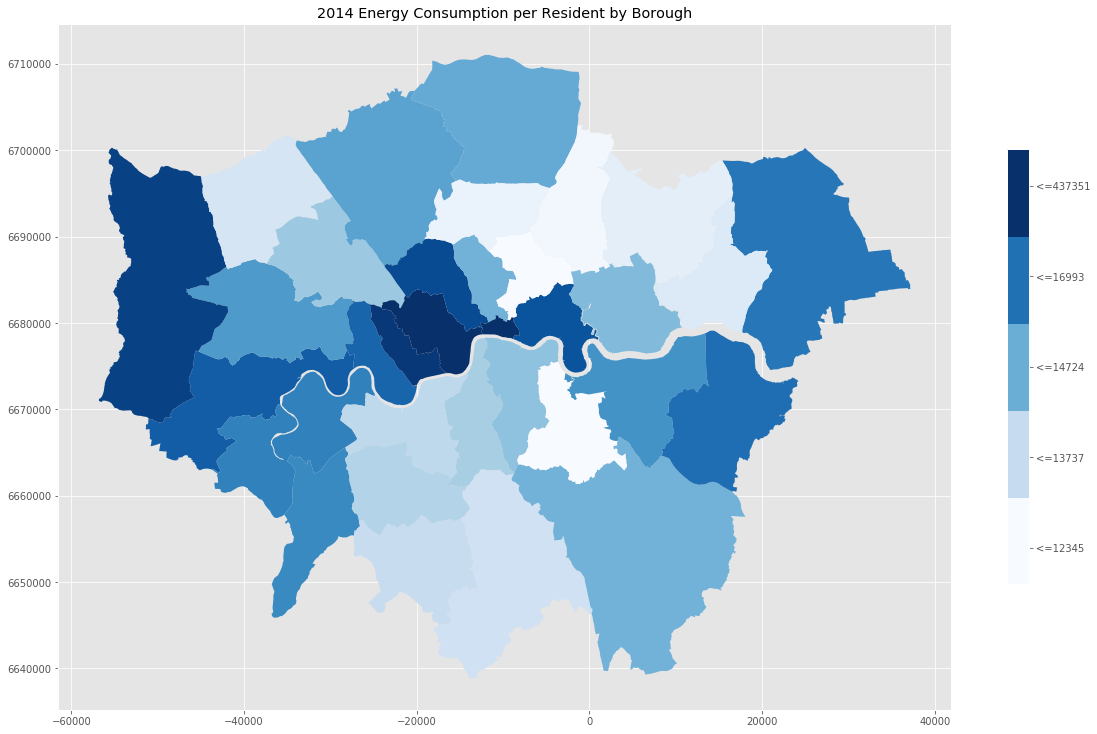

In [120]:
projected_geoenergy.plot(column='KWh/Resident', cmap='Blues', scheme='quantiles', k=30)
plt.title('2014 Energy Consumption per Resident by Borough in KWh')
plt.savefig('./data/ResidentEnergy.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)

In [123]:
breaks = Quantiles(
    geoenergy['GWh'].values,
    k=5)
print(breaks)

                 Quantiles                 
 
 Lower              Upper             Count
           x[i] <= 2970.751               7
2970.751 < x[i] <= 3343.179               6
3343.179 < x[i] <= 4154.486               7
4154.486 < x[i] <= 4671.362               6
4671.362 < x[i] <= 8285.378               7


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [124]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=2970', '<=3343', '<=4154', '<=4671', '<=8285']


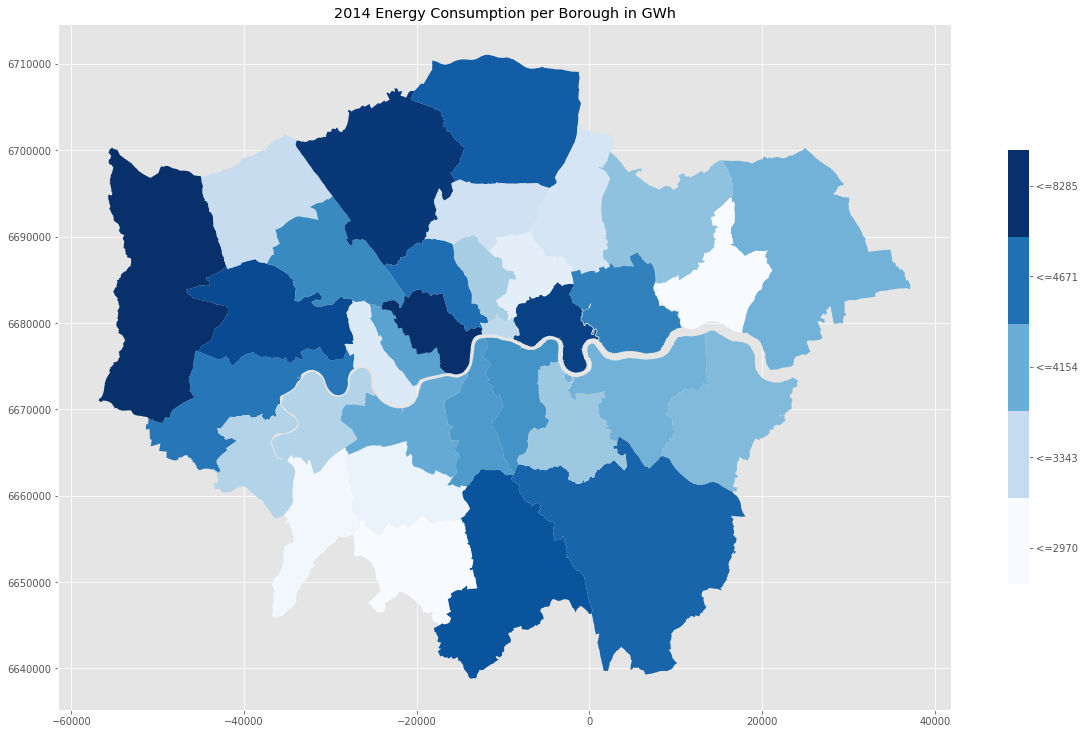

In [125]:
projected_geoenergy.plot(column='GWh', cmap='Blues', scheme='quantiles', k=30)
plt.title('2014 Energy Consumption per Borough in GWh')
plt.savefig('./data/BoroughEnergy.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)

In [132]:
breaks = Quantiles(
    geoenergy['KWh/Hectare'].values,
    k=5)
print(breaks)

                    Quantiles                    
 
   Lower                Upper               Count
              x[i] <=  580232.119               7
 580232.119 < x[i] <=  697572.213               6
 697572.213 < x[i] <= 1002659.296               7
1002659.296 < x[i] <= 1643901.260               6
1643901.260 < x[i] <= 9542962.933               7


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [133]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=580232', '<=697572', '<=1002659', '<=1643901', '<=9542962']


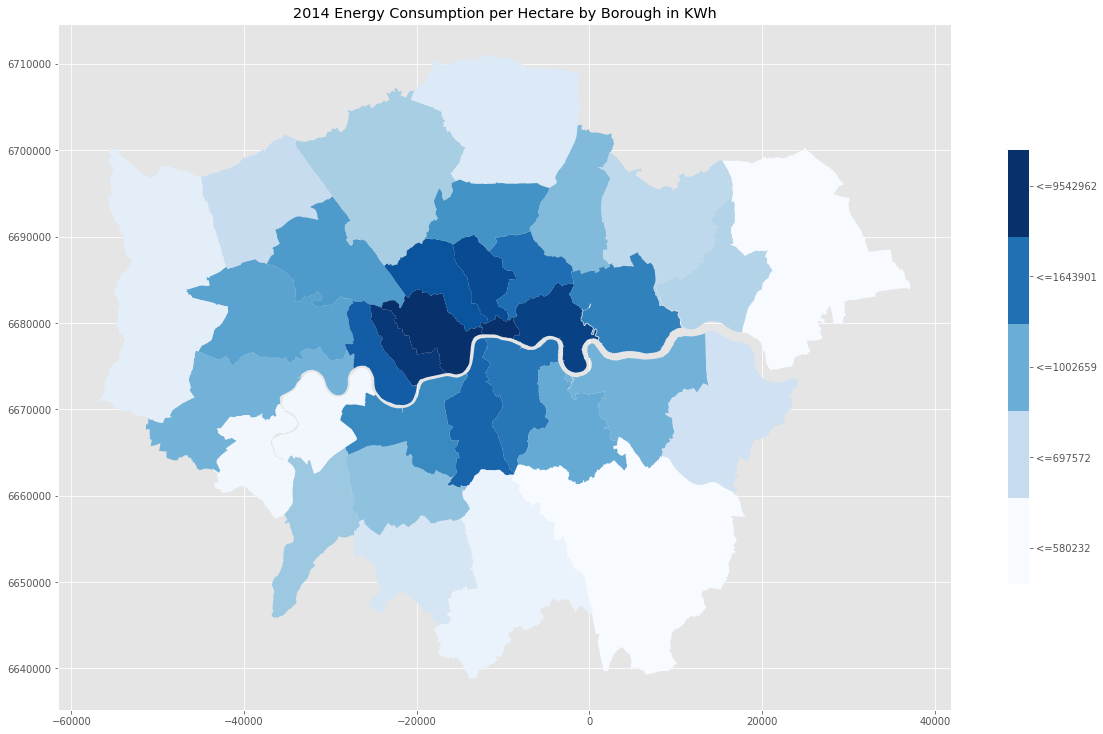

In [134]:
projected_geoenergy.plot(column='KWh/Hectare', cmap='Blues', scheme='quantiles', k=30)
plt.title('2014 Energy Consumption per Hectare by Borough in KWh')
plt.savefig('./data/AreaEnergy.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)